<a href="https://colab.research.google.com/github/TruongQuocHau110802/AI-subject/blob/main/nhan_dien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_hoa

/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_hoa


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_hoa/Train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 180 images belonging to 3 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_hoa/Validation',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 105 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'hoa hong': 0, 'hoa lan': 1, 'hoa sen': 2}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'hoa hong': 0, 'hoa lan': 1, 'hoa sen': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 100 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
6/6 [==============================] - 46s 8s/step - loss: 4.3398 - accuracy: 0.3944 - val_loss: 1.1027 - val_accuracy: 0.3810
Epoch 2/100
6/6 [==============================] - 15s 2s/step - loss: 1.0427 - accuracy: 0.4944 - val_loss: 0.8389 - val_accuracy: 0.7524
Epoch 3/100
6/6 [==============================] - 15s 2s/step - loss: 0.7186 - accuracy: 0.7778 - val_loss: 0.5896 - val_accuracy: 0.7429
Epoch 4/100
6/6 [==============================] - 14s 3s/step - loss: 0.4186 - accuracy: 0.8667 - val_loss: 0.3544 - val_accuracy: 0.8381
Epoch 5/100
6/6 [==============================] - 15s 2s/step - loss: 0.3766 - accuracy: 0.8500 - val_loss: 0.4266 - val_accuracy: 0.8476
Epoch 6/100
6/6 [==============================] - 15s 2s/step - loss: 0.3065 - accuracy: 0.9056 - val_loss: 0.2764 - val_accuracy: 0.9143
Epoch 7/100
6/6 [==============================] - 14s 2s/step - loss: 0.2493 - accuracy: 0.9278 - val_loss: 0.2362 - val_accuracy: 0.8952
Epoch 8/100
6/6 [==========

In [ ]:
# Lưu lại
model.save("nhan_dien_hoa.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_hoa.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0201527401804924
Train Accuracy 0.9888888597488403


<function matplotlib.pyplot.show(*args, **kw)>

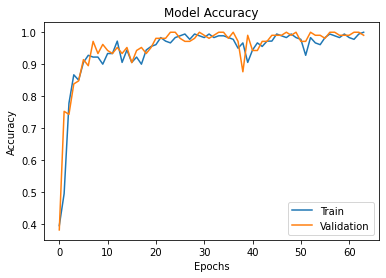

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

1/1 [==============================] - 0s 113ms/step
hoa lan


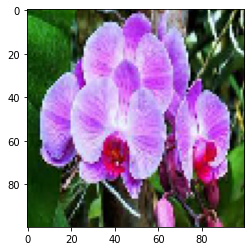

1/1 [==============================] - 0s 36ms/step
hoa lan


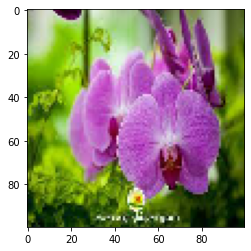

1/1 [==============================] - 0s 36ms/step
hoa lan


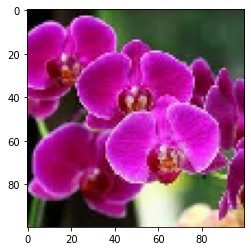

1/1 [==============================] - 0s 36ms/step
hoa lan


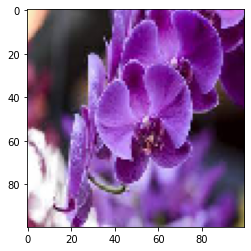

1/1 [==============================] - 0s 36ms/step
hoa sen


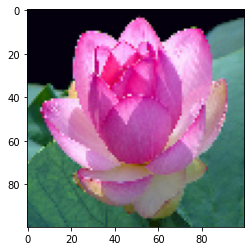

1/1 [==============================] - 0s 38ms/step
hoa sen


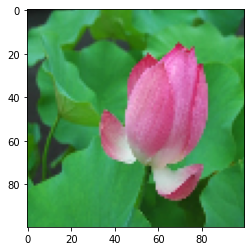

1/1 [==============================] - 0s 35ms/step
hoa sen


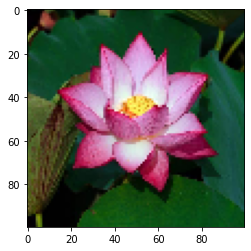

1/1 [==============================] - 0s 36ms/step
hoa sen


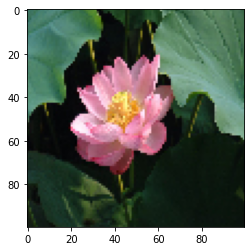

1/1 [==============================] - 0s 46ms/step
hoa hong


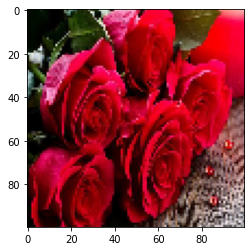

1/1 [==============================] - 0s 39ms/step
hoa hong


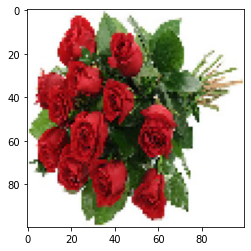

1/1 [==============================] - 0s 37ms/step
hoa hong


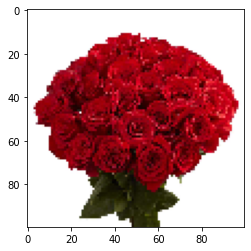

1/1 [==============================] - 0s 57ms/step
hoa hong


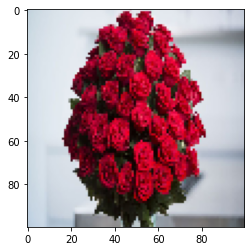

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks (1)/Du lieu/nhan_dien_hoa/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(100,100))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='hoa hong'
  if round(result[0][1])==1:
    prediction='hoa lan'
  if round(result[0][2])==1:
    prediction='hoa sen'
  print(prediction)
  plt.show()